In [3]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
#common.run(args="--help")
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-level ] arg (=1)   Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [3]:
args = f"--inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 1 -s 1 -n 10
639054 Edges loaded

Benchmark results:
Initialize	µ=0.0163755s	sigma=0.0153464s	median=0.00015947s	total=0.163755	num_calls=10
Kruskal()	µ=0.039851s	sigma=0.00720458s	median=0.0144968s	total=0.39851	num_calls=10
compress()	µ=2.21867e-07s	sigma=1.18242e-08s	median=2.31e-07s	total=6.656e-06	num_calls=30
filter()	µ=0.0019398s	sigma=0.000260025s	median=0.0027732s	total=0.0581941	num_calls=30
grow MST	µ=0.00046238s	sigma=4.86288e-05s	median=0.000308009s	total=0.0046238	num_calls=10
partition()	µ=0.00112844s	sigma=0.000128787s	median=0.000854787s	total=0.0338533	num_calls=30
sort()	µ=0.0390796s	sigma=0.00711948s	median=0.014017s	total=0.390796	num_calls=10
total	µ=0.0654738s	sigma=0.0145344s	median=0.0227081s	total=0.654738	num_calls=10


,tag,average,std_dev,median,total,num_calls
0,Initialize,1.637550e-02,1.534640e-02,1.594700e-04,0.163755,10
1,Kruskal(),3.985100e-02,7.204580e-03,1.449680e-02,0.398510,10
2,compress(),2.218670e-07,1.182420e-08,2.310000e-07,0.000007,30
3,filter(),1.939800e-03,2.600250e-04,2.773200e-03,0.058194,30
4,grow MST,4.623800e-04,4.862880e-05,3.080090e-04,0.004624,10
5,partition(),1.128440e-03,1.287870e-04,8.547870e-04,0.033853,30
6,sort(),3.907960e-02,7.119480e-03,1.401700e-02,0.390796,10
7,total,6.547380e-02,1.453440e-02,2.270810e-02,0.654738,10


In [4]:
args = f"--inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 0 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_1600_50pct.csv --mst-kernel 0 -s 1 -n 10
639054 Edges loaded

Benchmark results:
Initialize	µ=0.0139249s	sigma=0.0128582s	median=0.000145494s	total=0.139249	num_calls=10
Kruskal()	µ=0.328228s	sigma=0.0115543s	median=0.314681s	total=3.28228	num_calls=10
grow MST	µ=0.00357701s	sigma=4.59945e-05s	median=0.00344179s	total=0.0357701	num_calls=10
sort()	µ=0.323827s	sigma=0.0114621s	median=0.310511s	total=3.23827	num_calls=10
total	µ=0.342155s	sigma=0.0244109s	median=0.314827s	total=3.42155	num_calls=10


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.013925,0.012858,0.000145,0.139249,10
1,Kruskal(),0.328228,0.011554,0.314681,3.282280,10
2,grow MST,0.003577,0.000046,0.003442,0.035770,10
3,sort(),0.323827,0.011462,0.310511,3.238270,10
4,total,0.342155,0.024411,0.314827,3.421550,10


In [5]:
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-level ] arg (=1)   Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [1]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]
n_nodes_list_sparse = [15625, 31250, 65500, 125000, 250000, 500000, 1000000, 2000000]

n_nodes_list_d50_cpu = [50, 100, 200, 400, 800, 1600, 3200]


def get_run_list(n_nodes_list, density, prefix, flags, reps_standard=10, reps_last=3):
    run_list = []
    for n_nodes in n_nodes_list[:-1]:
        run_list.append({'n_nodes': n_nodes, 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_standard}'})
    # fewer repetitions on the biggest graph
    run_list.append({'n_nodes': n_nodes_list[-1], 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_last}'})
    return run_list


#define SORT_KERNEL_GPU_BUBBLE_MULT 0
#define SORT_KERNEL_MERGE_SORT 1
#define SORT_KERNEL_THRUST 2
#define SORT_KERNEL_RADIX 3

#define PARTITION_KERNEL_CPU_NAIVE 0
#define PARTITION_KERNEL_GPU 1
#define PARTITION_KERNEL_STREAMS 2
#define PARTITION_KERNEL_THRUST 3

#define FILTER_KERNEL_CPU_NAIVE 0
#define FILTER_KERNEL_GPU 1
#define FILTER_KERNEL_THRUST 2

#define COMPRESS_NOTHING 0
#define COMPRESS_KERNEL_CPU_NAIVE 1
#define COMPRESS_KERNEL_GPU 2
#define COMPRESS_KERNEL_GPU_LIMITED 3

"""
-m ... 0 : regular kruskal, 1 : filter kruskal
-s ... 2 : thrust sort, 3 : radix sort
-p ... 0 : partition cpu, 1 : partition gpu, 2 : partition thrust
-f ... 0 : filter cpu, 1 : filter gpu, 2 : filter thrust
-c ... 0 : no path compression, 1 : default, 2,3 : additional options

--pinned-memory 

"""

# pure cpu
regK_cpu = get_run_list(n_nodes_list_d50_cpu, '50pct', 'regK_cpu', '-m 0 -s 4')
filK_cpu = get_run_list(n_nodes_list_d50_cpu, '50pct', 'filK_cpu', '-m 1 -f 0 -p 0 -s 4')


# compare thrust sort with radix sort
regK_thrustsort_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_thrustsort', '-m 0 -s 2')

regK_radix_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix', '-m 0 -s 3')

regK_radix_pin_runs_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')
regK_radix_pin_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix_pin', '-m 0 -s 3 --pinned-memory')


# compare all thrust with our kernels (filter and partition on cpu)
filK_all_thrust_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')
filK_all_thrust_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_all_thrust', '-m 1 -s 2 -p 3 -f 2')

#filK_f0p0s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')
#filK_f0p0s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')
#filK_f0p0s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f0p0s3', '-m 1 -f 0 -p 0 -s 3')

# our kernels (filter and partition on gpu)
filK_f1p1s3_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3')
filK_f1p1s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3', reps_standard=2, reps_last=3)
#filK_f1p1s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3')
filK_f1p1s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3', reps_standard=3, reps_last=3)
filK_f1p1s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f1p1s3', '-m 1 -f 1 -p 1 -s 3', reps_standard=3, reps_last=3)

filK_f1p2s3_sparse = get_run_list(n_nodes_list_sparse, 'sparse', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
#filK_f1p2s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
filK_f1p2s3_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3', reps_standard=3, reps_last=3)
filK_f1p2s3_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')
filK_f1p2s3_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filK_f1p2s3', '-m 1 -f 1 -p 2 -s 3')



In [4]:
do_benchmark_runs(regK_cpu)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_cpu_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 4 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_cpu_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 4 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_cpu_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 4 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_cpu_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -s 4 -n 10
Running benchm

In [5]:
do_benchmark_runs(filK_cpu)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_cpu_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -m 1 -f 0 -p 0 -s 4 -n 10


terminate called after throwing an instance of 'boost::wrapexcept<boost::program_options::multiple_occurrences>'
  what():  option '--mst-kernel' cannot be specified more than once


CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_cpu_50_50pct.csv', '--inputfile', 'benchmark_data/barabasi_50_50pct.csv', '-m', '0', '-m', '1', '-f', '0', '-p', '0', '-s', '4', '-n', '10']' died with <Signals.SIGABRT: 6>.

In [7]:
do_benchmark_runs(regK_radix_pin_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_12

In [8]:
do_benchmark_runs(regK_radix_pin_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_800_10pct.csv --inpu

In [9]:
do_benchmark_runs(regK_radix_pin_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_400_50pct.csv --inputf

In [10]:
do_benchmark_runs(regK_radix_pin_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 3 --pinned-memory -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_pin_200_90pct.csv --inputfil

In [11]:
do_benchmark_runs(filK_f1p2s3_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_125000_sparse.csv --inputfile be

In [12]:
# crashed (change number of runs)
do_benchmark_runs(filK_f1p2s3_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 2 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_800_10pct.csv --inputfile benchmark_data/barabasi_800

In [13]:
do_benchmark_runs(filK_f1p2s3_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_400_50pct.csv --inputfile benchmark_data/barabasi_40

In [14]:
do_benchmark_runs(filK_f1p2s3_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 1 -p 2 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p2s3_200_90pct.csv --inputfile benchmark_data/barabasi_200_

In [15]:
do_benchmark_runs(filK_f1p1s3_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_125000_sparse.csv --inputfile be

In [18]:
do_benchmark_runs(filK_f1p1s3_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 2
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 2
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 1 -f 1 -p 1 -s 3 -n 2
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_800_10pct.csv --inputfile benchmark_data/barabasi_800

In [19]:
# chrashes
do_benchmark_runs(filK_f1p1s3_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 3
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_400_50pct.csv --inputfile benchmark_data/barabasi_400_5

In [20]:
# didnt call this one
do_benchmark_runs(filK_f1p1s3_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_200_90pct.csv --inputfile benchmark_data/barabasi_200_

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_1600_90pct.csv', '--inputfile', 'benchmark_data/barabasi_1600_90pct.csv', '-m', '1', '-f', '1', '-p', '1', '-s', '3', '-n', '10']' died with <Signals.SIGSEGV: 11>.

In [ ]:
do_benchmark_runs(filK_all_thrust_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_125000_sparse.csv --inputfile b

In [ ]:
do_benchmark_runs(filK_all_thrust_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_800_10pct.csv --inputfile benchmark_data/barabasi

In [ ]:
do_benchmark_runs(filK_all_thrust_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_400_50pct.csv --inputfile benchmark_data/barabasi_4

In [ ]:
do_benchmark_runs(filK_all_thrust_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_all_thrust_200_90pct.csv --inputfile benchmark_data/barabasi_200

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_125000_sparse.csv --inputfile benchmark_data/b

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv 

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_thrustsort_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0

In [ ]:
do_benchmark_runs(regK_radix_runs_sparse)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_15625_sparse.csv --inputfile benchmark_data/barabasi_15625_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_31250_sparse.csv --inputfile benchmark_data/barabasi_31250_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_65500_sparse.csv --inputfile benchmark_data/barabasi_65500_sparse.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_125000_sparse.csv --inputfile benchmark_data/barabasi_125000_spars

In [ ]:
do_benchmark_runs(regK_radix_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -m 0 -s 3 -n 10
Runn

In [ ]:
do_benchmark_runs(regK_radix_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -s 3 -n 10
Runnin

In [ ]:
do_benchmark_runs(regK_radix_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regK_radix_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0 -s 3 -n 10
Running 

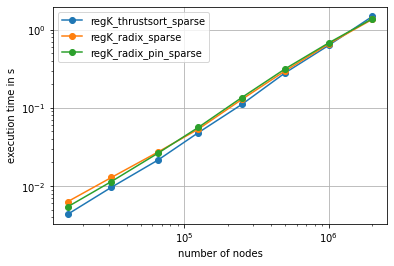

In [3]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + regK_radix_pin_runs_sparse)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_sparse.pdf", dpi=200, format='pdf')

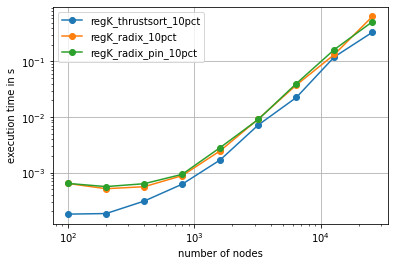

In [4]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + regK_radix_pin_runs_d10)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d10.pdf", dpi=200, format='pdf')


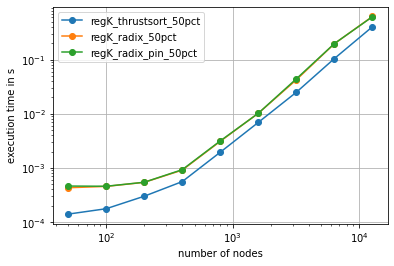

In [5]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50 + regK_radix_pin_runs_d50)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d50.pdf", dpi=200, format='pdf')

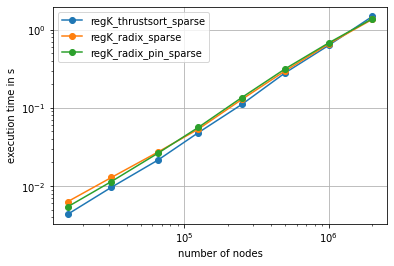

In [6]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + regK_radix_pin_runs_sparse)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_sparse.pdf", dpi=200, format='pdf')

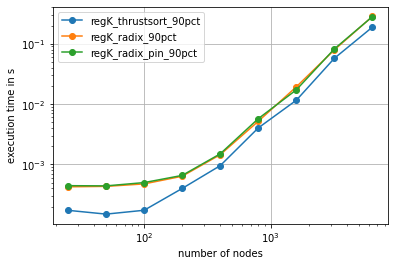

In [7]:
plot_lines(regK_thrustsort_runs_d90 + regK_radix_runs_d90 + regK_radix_pin_runs_d90)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d90.pdf", dpi=200, format='pdf')

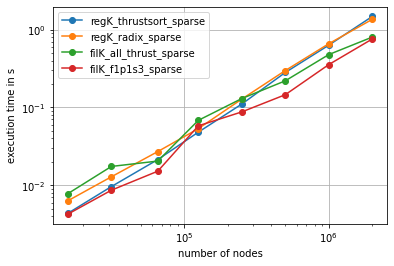

In [8]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + filK_all_thrust_sparse + filK_f1p1s3_sparse)
plt.savefig(common.OUT_DIR / "all_four_sparse.pdf", dpi=200, format='pdf')

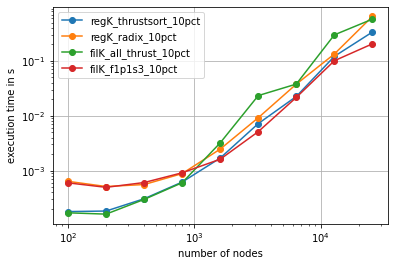

In [9]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + filK_all_thrust_d10 + filK_f1p1s3_d10)
plt.savefig(common.OUT_DIR / "all_four_d10.pdf", dpi=200, format='pdf')

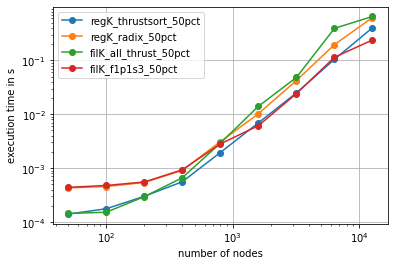

In [10]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50 + filK_all_thrust_d50 + filK_f1p1s3_d50)
plt.savefig(common.OUT_DIR / "all_four_d50.pdf", dpi=200, format='pdf')

In [11]:
#plot_lines(regK_thrustsort_runs_d90 + regK_radix_runs_d90 + filK_all_thrust_d90 + filK_f1p1s3_d90)
#plt.savefig(common.OUT_DIR / "all_four_d90.pdf", dpi=200, format='pdf')

FileNotFoundError: [Errno 2] No such file or directory: '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filK_f1p1s3_3200_90pct.csv'

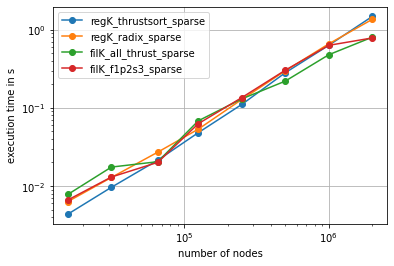

In [12]:
plot_lines(regK_thrustsort_runs_sparse + regK_radix_runs_sparse + filK_all_thrust_sparse + filK_f1p2s3_sparse)
plt.savefig(common.OUT_DIR / "all_four_p2_sparse.pdf", dpi=200, format='pdf')

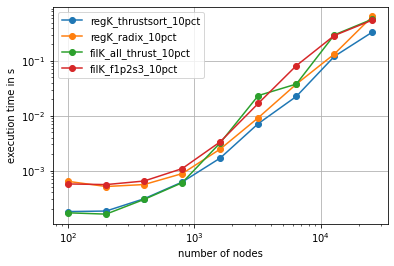

In [13]:
plot_lines(regK_thrustsort_runs_d10 + regK_radix_runs_d10 + filK_all_thrust_d10 + filK_f1p2s3_d10)
plt.savefig(common.OUT_DIR / "all_four_p2_d10.pdf", dpi=200, format='pdf')

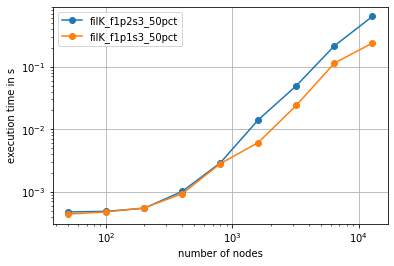

In [14]:
plot_lines(filK_f1p2s3_d50 + filK_f1p1s3_d50)
plt.savefig(common.OUT_DIR / "compare_stream_d50.pdf", dpi=200, format='pdf')

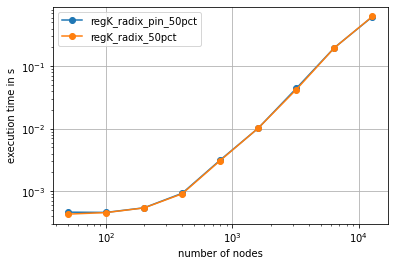

In [26]:
plot_lines(regK_radix_pin_runs_d50 + regK_radix_runs_d50)
plt.savefig(common.OUT_DIR / "compare_pinned_d50.pdf", dpi=200, format='pdf')

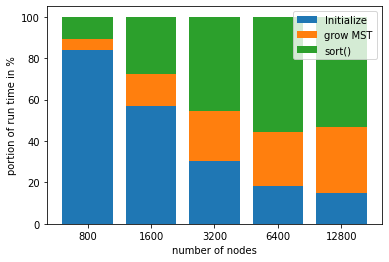

In [20]:
stacked_bars(regK_radix_runs_d50[-5:], regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regK_radix_d50.pdf", dpi=200, format='pdf')


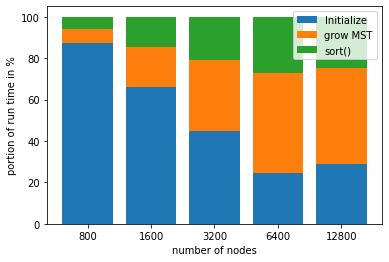

In [21]:
stacked_bars(regK_thrustsort_runs_d50[-5:], regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regK_thrustsort_d50.pdf", dpi=200, format='pdf')


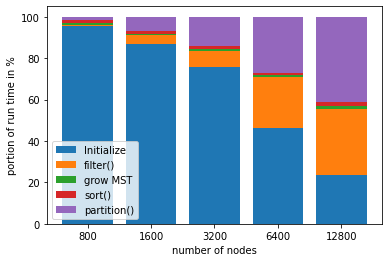

In [22]:
stacked_bars(filK_f1p1s3_d50[-5:])
plt.savefig(common.OUT_DIR / "bars_filK_f1p1s3_d50.pdf", dpi=200, format='pdf')

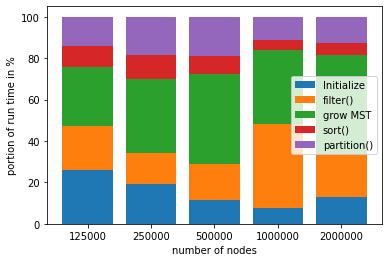

In [25]:
stacked_bars(filK_f1p1s3_sparse[-5:])
plt.savefig(common.OUT_DIR / "bars_filK_f1p1s3_sparse.pdf", dpi=200, format='pdf')

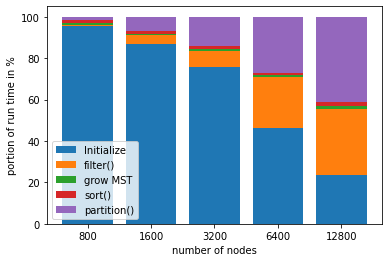

In [23]:
stacked_bars(filK_f1p1s3_d50[-5:])
plt.savefig(common.OUT_DIR / "bars_filK_f1p1s3_d50.pdf", dpi=200, format='pdf')

[800, 1600, 3200, 6400, 12800]


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

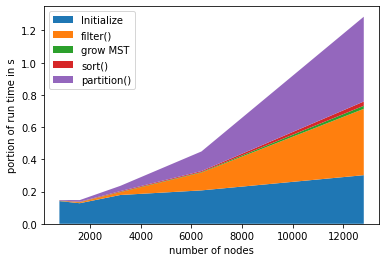

In [24]:

labels, stack = collect_for_stack(filK_f1p1s3_d50[-5:])
print(labels)
stack
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()